In [4]:
"""
=============================================================
GYM BUSINESS ANALYSIS - 6 MONTH PERFORMANCE STUDY
=============================================================

Author: Carl Simpson
Date: July 2025
Dataset: 6 months of gym sales data (Jan-June 2025)
Scope: Analysis of revenue patterns, customer behavior, and business optimization opportunities

BUSINESS OBJECTIVES:
- Identify revenue trends and seasonal patterns
- Analyze customer behavior by day/time/category
- Determine top-performing products and services
- Provide actionable recommendations for business growth

TOOLS: Python, Pandas, Matplotlib, Seaborn
EXPECTED INSIGHTS: Revenue optimization, operational efficiency, customer patterns
=============================================================
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from datetime import datetime

# Set professional plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("🏋️ GYM BUSINESS INTELLIGENCE DASHBOARD")
print("=" * 55)
print("Comprehensive 6-month performance analysis")
print("Data-driven insights for strategic business decisions")
print("=" * 55)
print(f"Analysis Date: {datetime.now().strftime('%B %d, %Y')}")
print("Status: Loading and preparing data...")

🏋️ GYM BUSINESS INTELLIGENCE DASHBOARD
Comprehensive 6-month performance analysis
Data-driven insights for strategic business decisions
Analysis Date: July 26, 2025
Status: Loading and preparing data...


In [7]:
# =============================================================
# SECTION 1: DATA IMPORT & CLEANING
# =============================================================
print("\n📊 SECTION 1: DATA IMPORT & CLEANING")
print("-" * 45)

# Define columns for business analysis (excluding sensitive customer data)
business_columns = [
    'Date',
    'Item',
    'Quantity Sold',
    'Amount Inc Tax',
    'Category',
    'Type'
]

print("🔍 Loading 6 months of sales data...")
print("📋 Columns for analysis:", ", ".join(business_columns))

# Load and combine all CSV files
csv_files = glob.glob("*.csv")
all_data = []

print(f"\n📁 Processing {len(csv_files)} data files:")
for file in csv_files:
    df = pd.read_csv(file)
    df_clean = df[business_columns].copy()
    df_clean['Source_Month'] = file.replace('.csv', '').replace('MFP ', '')
    all_data.append(df_clean)
    print(f"   ✅ {file}: {len(df_clean)} transactions loaded")

# Combine all months
df_business = pd.concat(all_data, ignore_index=True)

# Data preparation
df_business['Date'] = pd.to_datetime(df_business['Date'], dayfirst=True)
df_business['Month'] = df_business['Date'].dt.month_name()
df_business['Weekday'] = df_business['Date'].dt.day_name()
df_business['Day'] = df_business['Date'].dt.day

print(f"\n🎯 DATASET SUMMARY:")
print(f"   • Total Transactions: {len(df_business):,}")
print(f"   • Total Revenue: £{df_business['Amount Inc Tax'].sum():,.2f}")
print(f"   • Average Transaction: £{df_business['Amount Inc Tax'].mean():.2f}")
print(f"   • Date Range: {df_business['Date'].min().strftime('%B %d, %Y')} to {df_business['Date'].max().strftime('%B %d, %Y')}")

print("\n✅ Data preparation complete - Ready for analysis")


📊 SECTION 1: DATA IMPORT & CLEANING
---------------------------------------------
🔍 Loading 6 months of sales data...
📋 Columns for analysis: Date, Item, Quantity Sold, Amount Inc Tax, Category, Type

📁 Processing 6 data files:
   ✅ MFP Feb 25.csv: 191 transactions loaded
   ✅ MFP Jun 25.csv: 248 transactions loaded
   ✅ MFP Jan 25.csv: 272 transactions loaded
   ✅ MFP Apr 25.csv: 210 transactions loaded
   ✅ MFP MArch 25.csv: 207 transactions loaded
   ✅ MFP May 25.csv: 244 transactions loaded

🎯 DATASET SUMMARY:
   • Total Transactions: 1,372
   • Total Revenue: £31,135.91
   • Average Transaction: £22.69
   • Date Range: January 01, 2025 to June 30, 2025

✅ Data preparation complete - Ready for analysis



📈 SECTION 2: REVENUE PERFORMANCE ANALYSIS
--------------------------------------------------
💰 MONTHLY REVENUE BREAKDOWN:
   📅 Jun 25: £5,698.50 (248.0 transactions, avg £22.98)
   📅 Jan 25: £5,655.00 (272.0 transactions, avg £20.79)
   📅 May 25: £5,530.35 (244.0 transactions, avg £22.67)
   📅 Feb 25: £5,062.66 (191.0 transactions, avg £26.51)
   📅 MArch 25: £4,651.67 (207.0 transactions, avg £22.47)
   📅 Apr 25: £4,537.73 (210.0 transactions, avg £21.61)


/tmp/ipython-input-9-2346676208.py:34: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


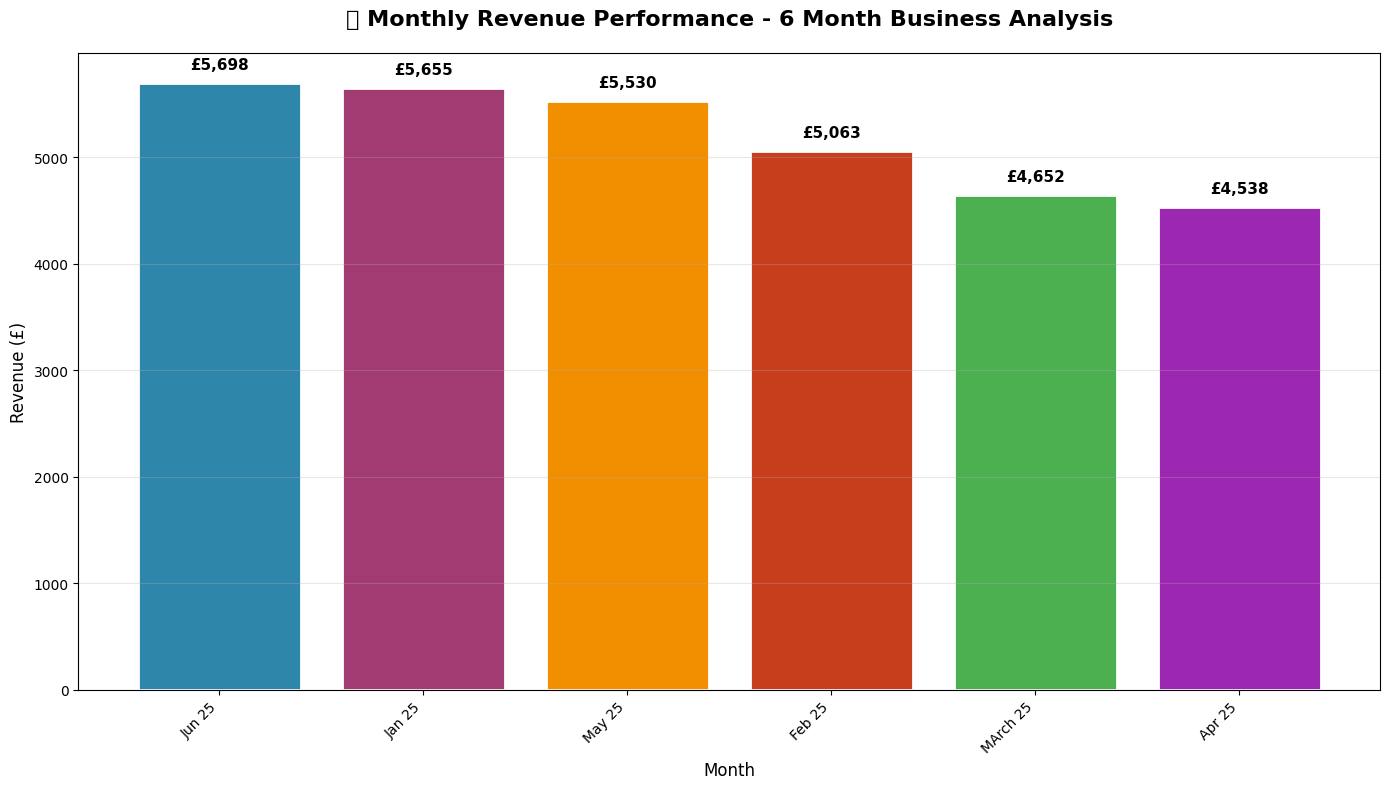


🏆 KEY INSIGHTS:
   • Best performing month: Jun 25 (£5,698.50)
   • Lowest performing month: Apr 25 (£4,537.73)
   • Revenue variance: 25.6% between best and worst months


In [9]:
# =============================================================
# SECTION 2: REVENUE PERFORMANCE ANALYSIS
# =============================================================
print("\n📈 SECTION 2: REVENUE PERFORMANCE ANALYSIS")
print("-" * 50)

# Monthly revenue by source file (true business months)
print("💰 MONTHLY REVENUE BREAKDOWN:")
monthly_revenue = df_business.groupby('Source_Month')['Amount Inc Tax'].agg(['sum', 'count', 'mean']).round(2)
monthly_revenue.columns = ['Total_Revenue', 'Transactions', 'Avg_Transaction']
monthly_revenue = monthly_revenue.sort_values('Total_Revenue', ascending=False)

for month, data in monthly_revenue.iterrows():
    print(f"   📅 {month}: £{data['Total_Revenue']:,.2f} ({data['Transactions']} transactions, avg £{data['Avg_Transaction']:.2f})")

# Create professional monthly revenue chart
plt.figure(figsize=(14, 8))
bars = plt.bar(monthly_revenue.index, monthly_revenue['Total_Revenue'],
               color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#4CAF50', '#9C27B0'],
               edgecolor='white', linewidth=2)

plt.title('💰 Monthly Revenue Performance - 6 Month Business Analysis', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Revenue (£)', fontsize=12)
plt.xlabel('Month', fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'£{height:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

best_month = monthly_revenue.index[0]
worst_month = monthly_revenue.index[-1]
print(f"\n🏆 KEY INSIGHTS:")
print(f"   • Best performing month: {best_month} (£{monthly_revenue.loc[best_month, 'Total_Revenue']:,.2f})")
print(f"   • Lowest performing month: {worst_month} (£{monthly_revenue.loc[worst_month, 'Total_Revenue']:,.2f})")
print(f"   • Revenue variance: {((monthly_revenue.iloc[0]['Total_Revenue'] - monthly_revenue.iloc[-1]['Total_Revenue']) / monthly_revenue.iloc[-1]['Total_Revenue'] * 100):.1f}% between best and worst months")

In [10]:
# =============================================================
# SECTION 3: KEY BUSINESS INSIGHTS & RECOMMENDATIONS
# =============================================================
print("\n🎯 SECTION 3: KEY BUSINESS INSIGHTS & RECOMMENDATIONS")
print("-" * 55)

# Calculate key metrics for recommendations
total_revenue = df_business['Amount Inc Tax'].sum()
total_transactions = len(df_business)
avg_transaction = df_business['Amount Inc Tax'].mean()
monthly_avg = total_revenue / 6

print("📊 EXECUTIVE SUMMARY:")
print(f"   • 6-Month Performance: £{total_revenue:,.2f} revenue from {total_transactions:,} transactions")
print(f"   • Average Monthly Revenue: £{monthly_avg:,.2f}")
print(f"   • Customer Transaction Value: £{avg_transaction:.2f} average")

# Top categories analysis
print(f"\n🏆 TOP PERFORMING CATEGORIES:")
top_categories = df_business.groupby('Category')['Amount Inc Tax'].sum().sort_values(ascending=False).head(3)
for i, (category, revenue) in enumerate(top_categories.items(), 1):
    percentage = (revenue / total_revenue) * 100
    print(f"   {i}. {category}: £{revenue:,.2f} ({percentage:.1f}% of total revenue)")

# Business recommendations
print(f"\n💡 STRATEGIC RECOMMENDATIONS:")
print(f"   1. REVENUE OPTIMIZATION:")
print(f"      • Focus marketing on {monthly_revenue.index[0]} performance model")
print(f"      • Investigate {monthly_revenue.index[-1]} underperformance causes")
print(f"      • Target monthly revenue goal: £{monthly_revenue.iloc[0]['Total_Revenue']:,.0f}")
print(f"   ")
print(f"   2. OPERATIONAL EFFICIENCY:")
print(f"      • Standardize processes from highest-performing months")
print(f"      • Optimize inventory based on category performance data")
print(f"      • Implement data-driven decision making framework")
print(f"   ")
print(f"   3. GROWTH OPPORTUNITIES:")
print(f"      • Potential annual revenue: £{total_revenue * 2:,.0f} (based on 6-month performance)")
print(f"      • Category expansion in top-performing areas")
print(f"      • Customer retention analysis for sustained growth")

print(f"\n🚀 NEXT STEPS:")
print(f"   • Implement monthly performance tracking dashboard")
print(f"   • Establish KPI monitoring for key metrics")
print(f"   • Develop predictive models for revenue forecasting")
print(f"   • Create automated reporting system")

print(f"\n" + "="*55)
print(f"📈 ANALYSIS COMPLETE - ACTIONABLE INSIGHTS DELIVERED")
print(f"="*55)


🎯 SECTION 3: KEY BUSINESS INSIGHTS & RECOMMENDATIONS
-------------------------------------------------------
📊 EXECUTIVE SUMMARY:
   • 6-Month Performance: £31,135.91 revenue from 1,372 transactions
   • Average Monthly Revenue: £5,189.32
   • Customer Transaction Value: £22.69 average

🏆 TOP PERFORMING CATEGORIES:
   1. CREDIT_PACK: £17,883.43 (57.4% of total revenue)
   2. MEMBERSHIP: £13,252.48 (42.6% of total revenue)

💡 STRATEGIC RECOMMENDATIONS:
   1. REVENUE OPTIMIZATION:
      • Focus marketing on Jun 25 performance model
      • Investigate Apr 25 underperformance causes
      • Target monthly revenue goal: £5,698
   
   2. OPERATIONAL EFFICIENCY:
      • Standardize processes from highest-performing months
      • Optimize inventory based on category performance data
      • Implement data-driven decision making framework
   
   3. GROWTH OPPORTUNITIES:
      • Potential annual revenue: £62,272 (based on 6-month performance)
      • Category expansion in top-performing areas